# HD97658

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy.io import fits
import astropy.units as u

In [3]:
name = 'HD97658'

In [4]:
fnames = np.asarray(glob(f'/Volumes/Nibelheim/hst/data/{name}/*.fits'))

In [5]:
obs = om.Observation.from_files(fnames)

/Users/ch/HST/projects/ombre/src/ombre/visit.py:208: RuntimeWarning: divide by zero encountered in true_divide
  w[self.err / self.sci > 0.1] = 1e10


In [6]:
obs

HD-97658 [8 Visits]

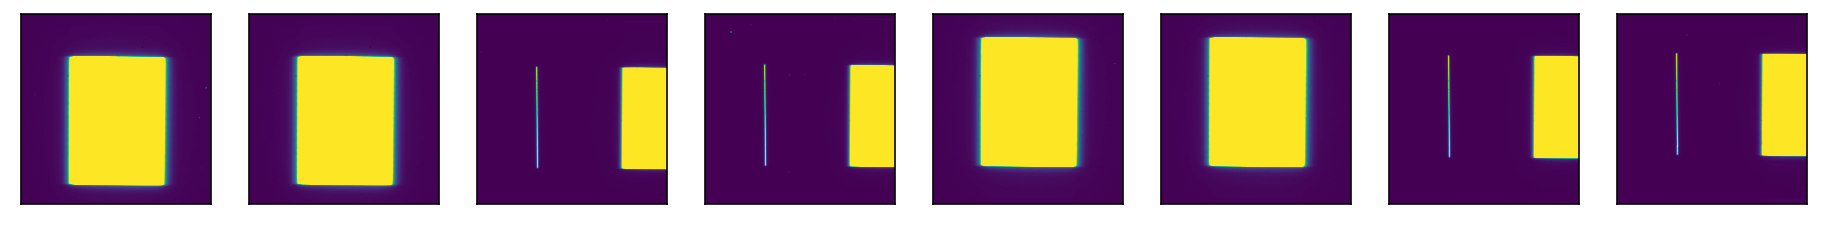

In [7]:
fig, ax = plt.subplots(1, len(obs), figsize=(len(obs) * 2, 2))
for idx, visit in enumerate(obs):
    ax[idx].imshow(visit.sci[0], vmin=0, vmax=1000)
    ax[idx].set(xticks=[], yticks=[])

In [8]:
clc = lk.search_lightcurve(name, author='SPOC').download_all().stitch().remove_nans().flatten(1001)
clc.flux = clc.flux.value * u.electron/u.s
clc.flux_err = clc.flux_err.value * u.electron/u.s

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

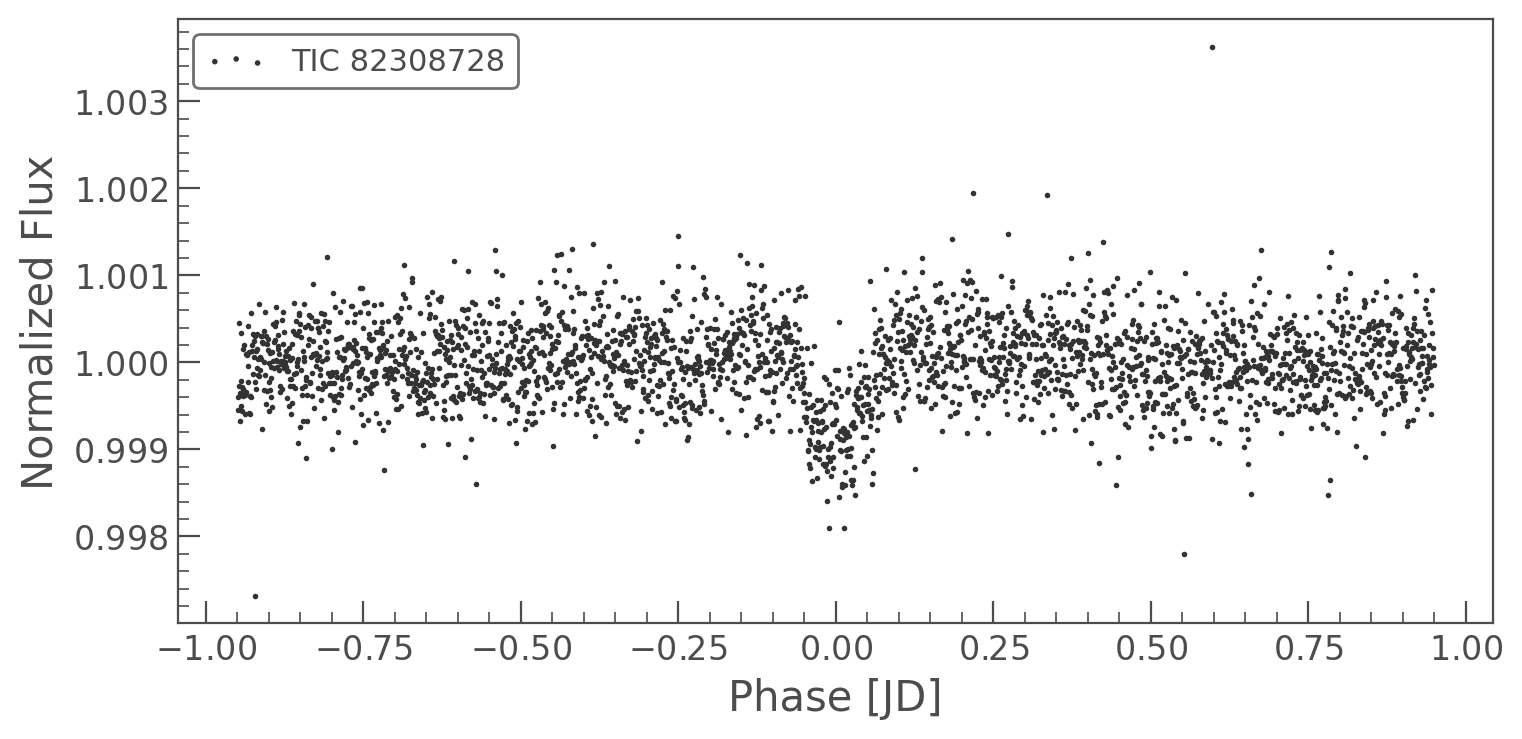

In [9]:
k = np.abs(((clc.time.value - (obs.t0 - 2457000 + obs.period/2))/obs.period) % 1 - 0.5) < 0.1
clc[k].fold(obs.period, obs.t0 - 2457000).scatter()

In [10]:
obs.t0 = 2458904.9366
obs.period = 9.4897116

In [11]:
obs.fit_transit(fit_t0=True, fit_period=False, fit_inc=False)

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

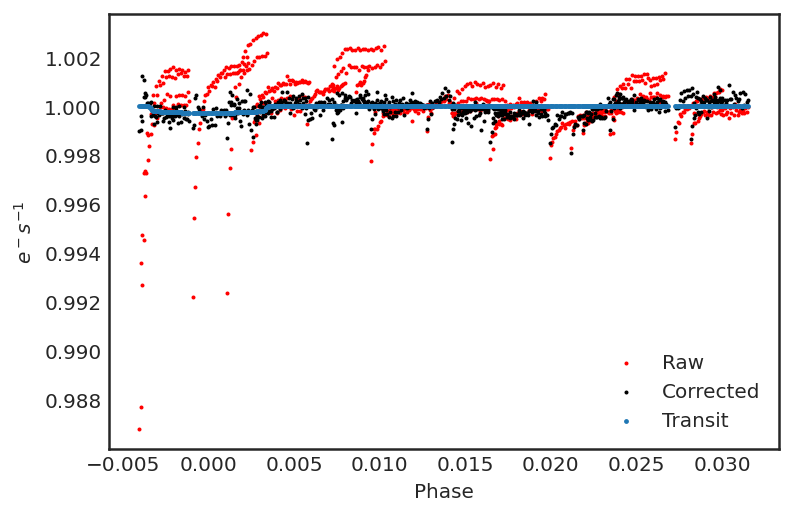

In [12]:
obs.plot()

In [13]:
obs.fit_model()

Fitting Transit/Eclipse Model:   0%|          | 0/8 [00:00<?, ?it/s]

Fitting Transit/Eclipse Model:  12%|█▎        | 1/8 [00:46<05:26, 46.65s/it]

Fitting Transit/Eclipse Model:  25%|██▌       | 2/8 [01:29<04:26, 44.34s/it]

Fitting Transit/Eclipse Model:  38%|███▊      | 3/8 [02:30<04:20, 52.13s/it]

Fitting Transit/Eclipse Model:  50%|█████     | 4/8 [03:28<03:37, 54.43s/it]

Fitting Transit/Eclipse Model:  62%|██████▎   | 5/8 [04:06<02:25, 48.36s/it]

Fitting Transit/Eclipse Model:  75%|███████▌  | 6/8 [04:44<01:29, 44.75s/it]

Fitting Transit/Eclipse Model:  88%|████████▊ | 7/8 [05:45<00:50, 50.33s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 8/8 [06:45<00:00, 53.35s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 8/8 [06:45<00:00, 50.71s/it]

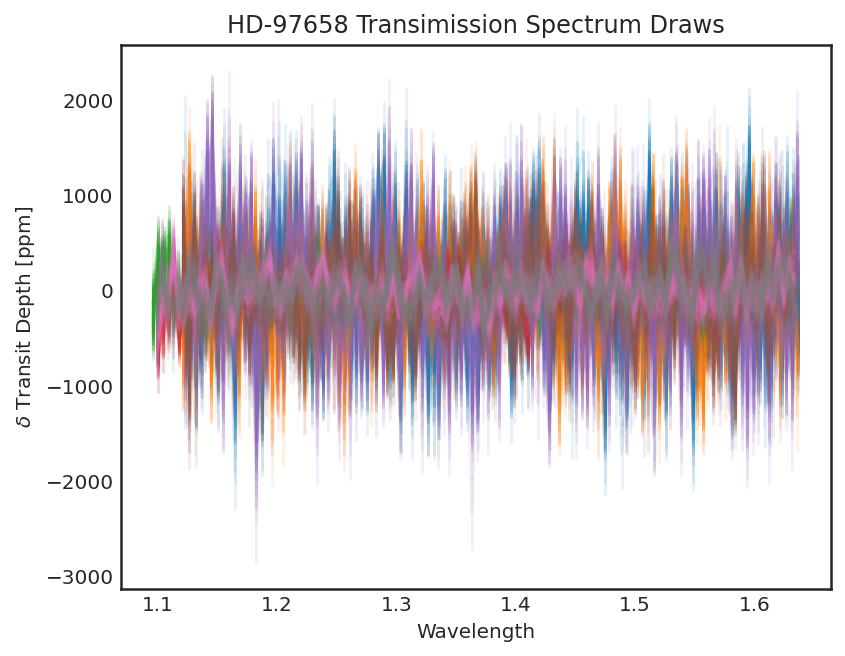

In [14]:
obs.plot_spectra()

<AxesSubplot:title={'center':'HD-97658 Transmission Spectrum, Visit: 1'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

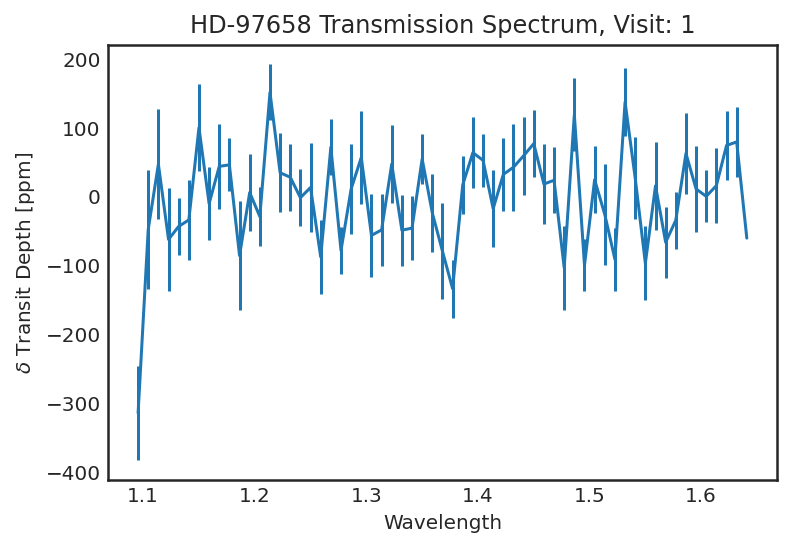

In [15]:
om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 100)).plot()

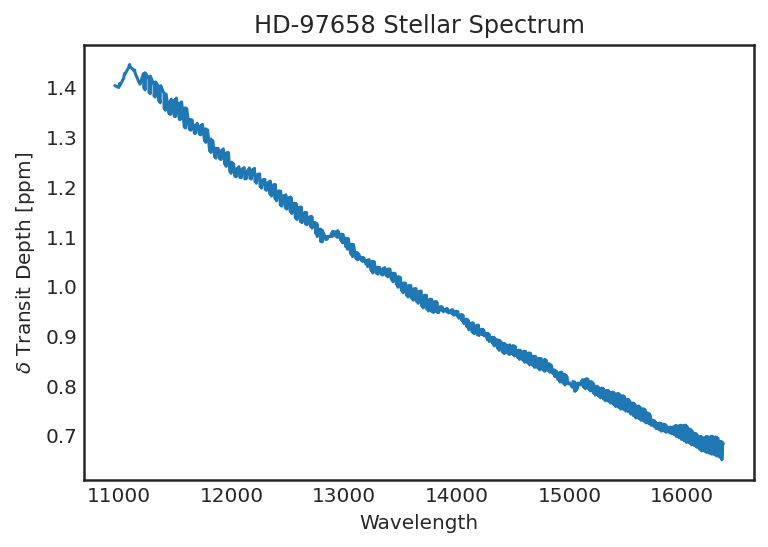

In [16]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

In [17]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits', overwrite=True)
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits', overwrite=True)
except:
    pass

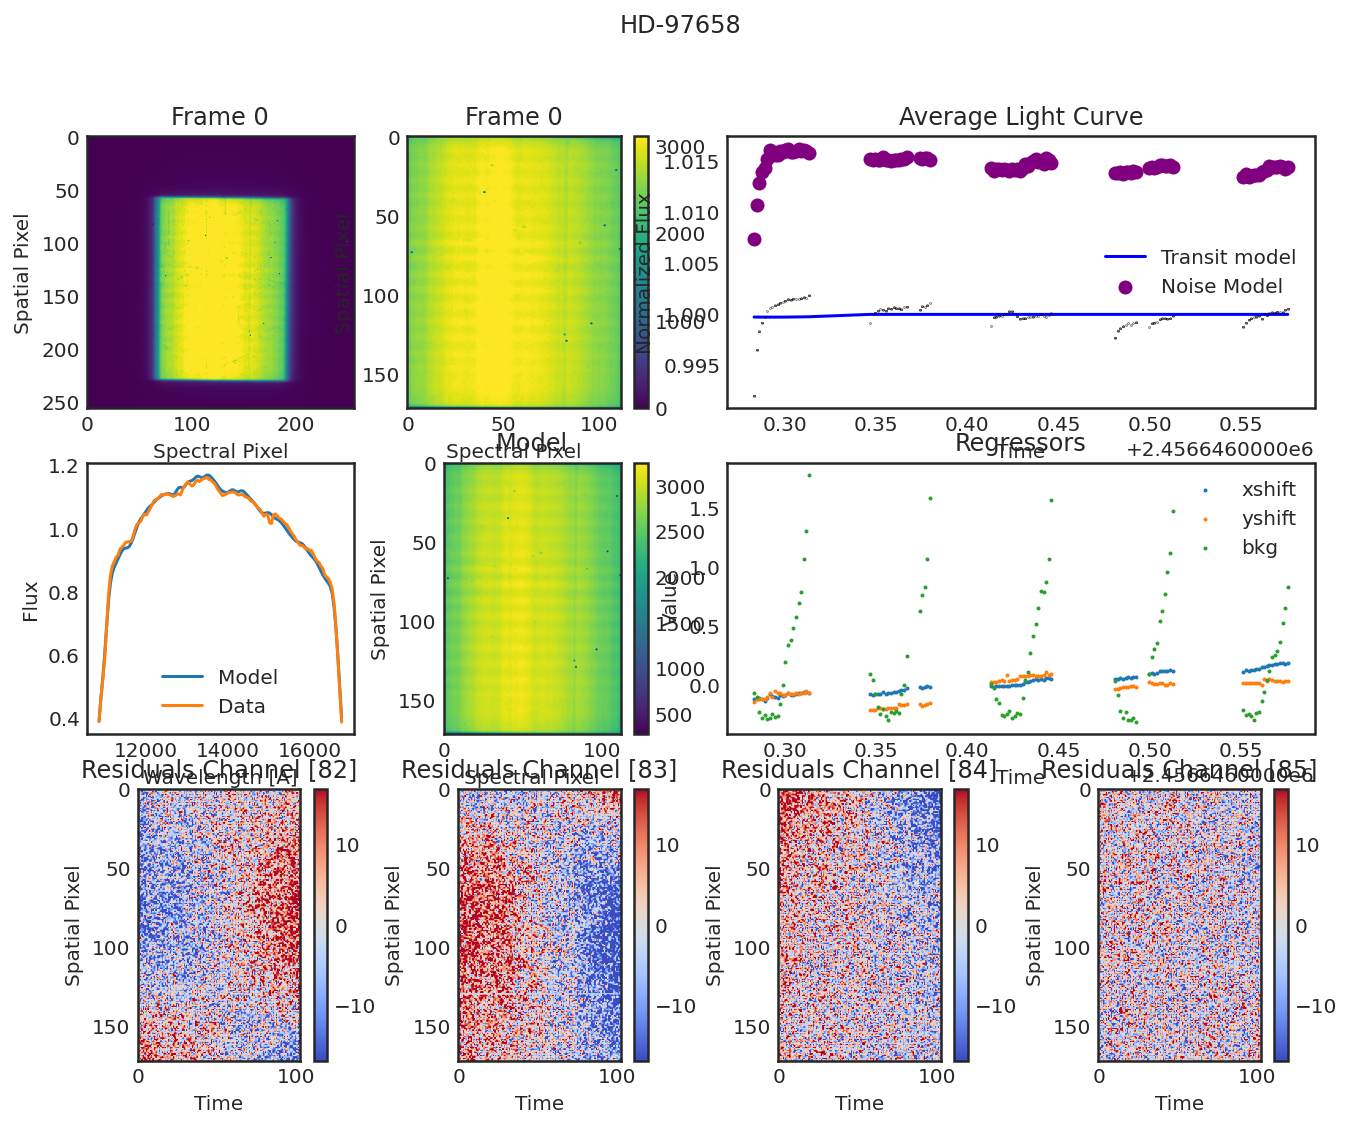

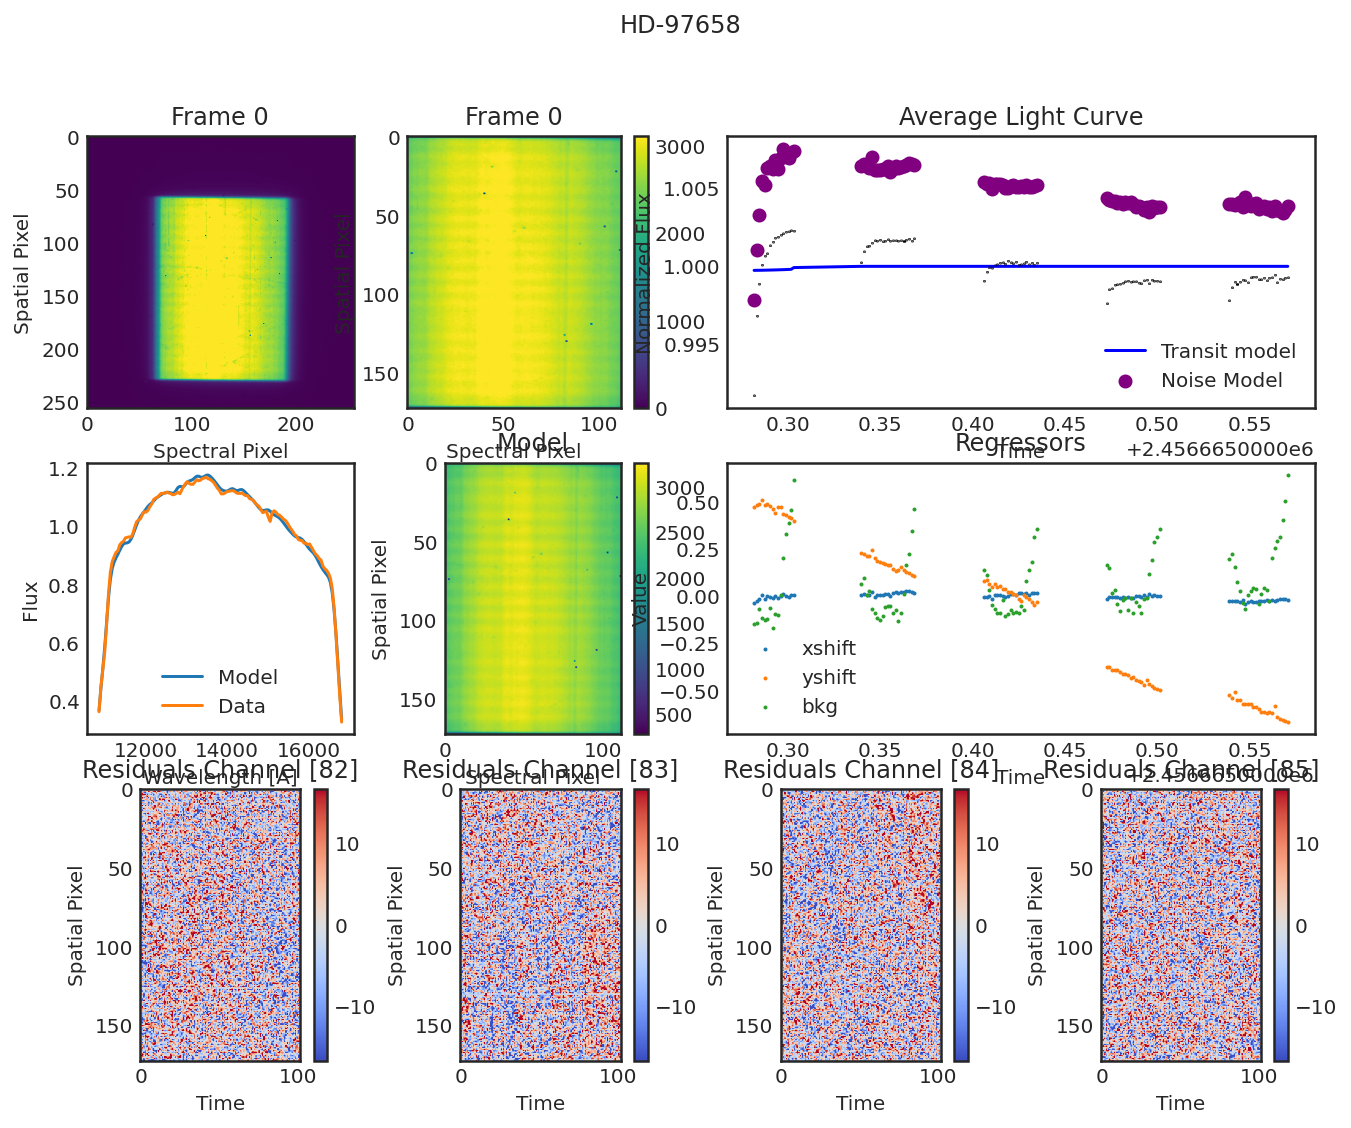

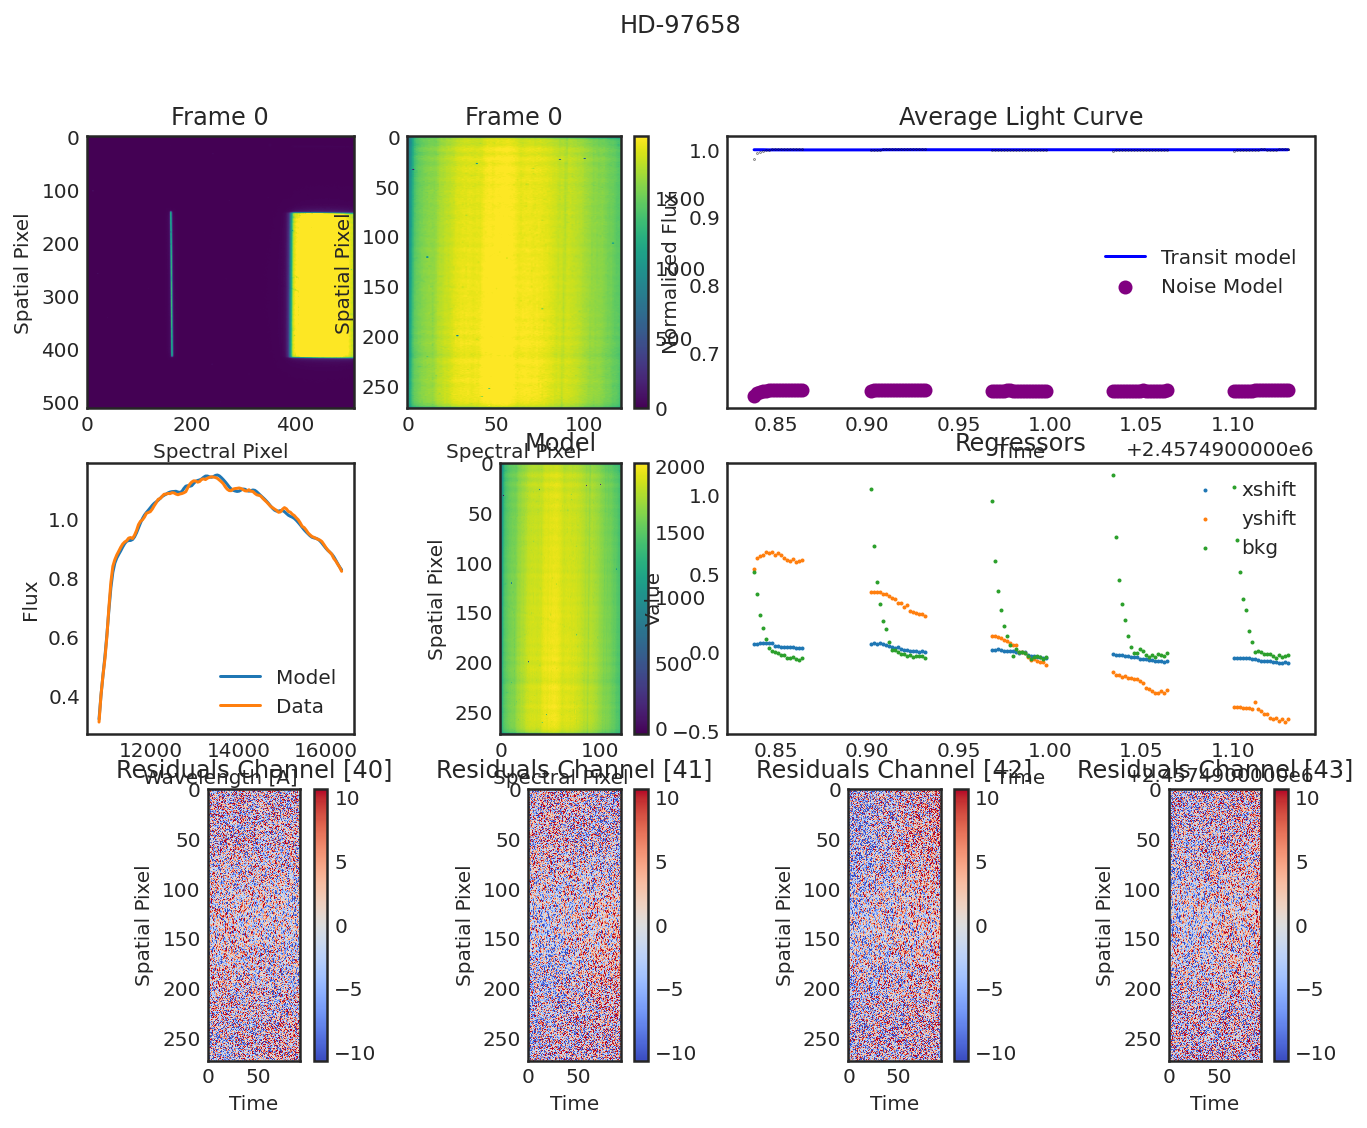

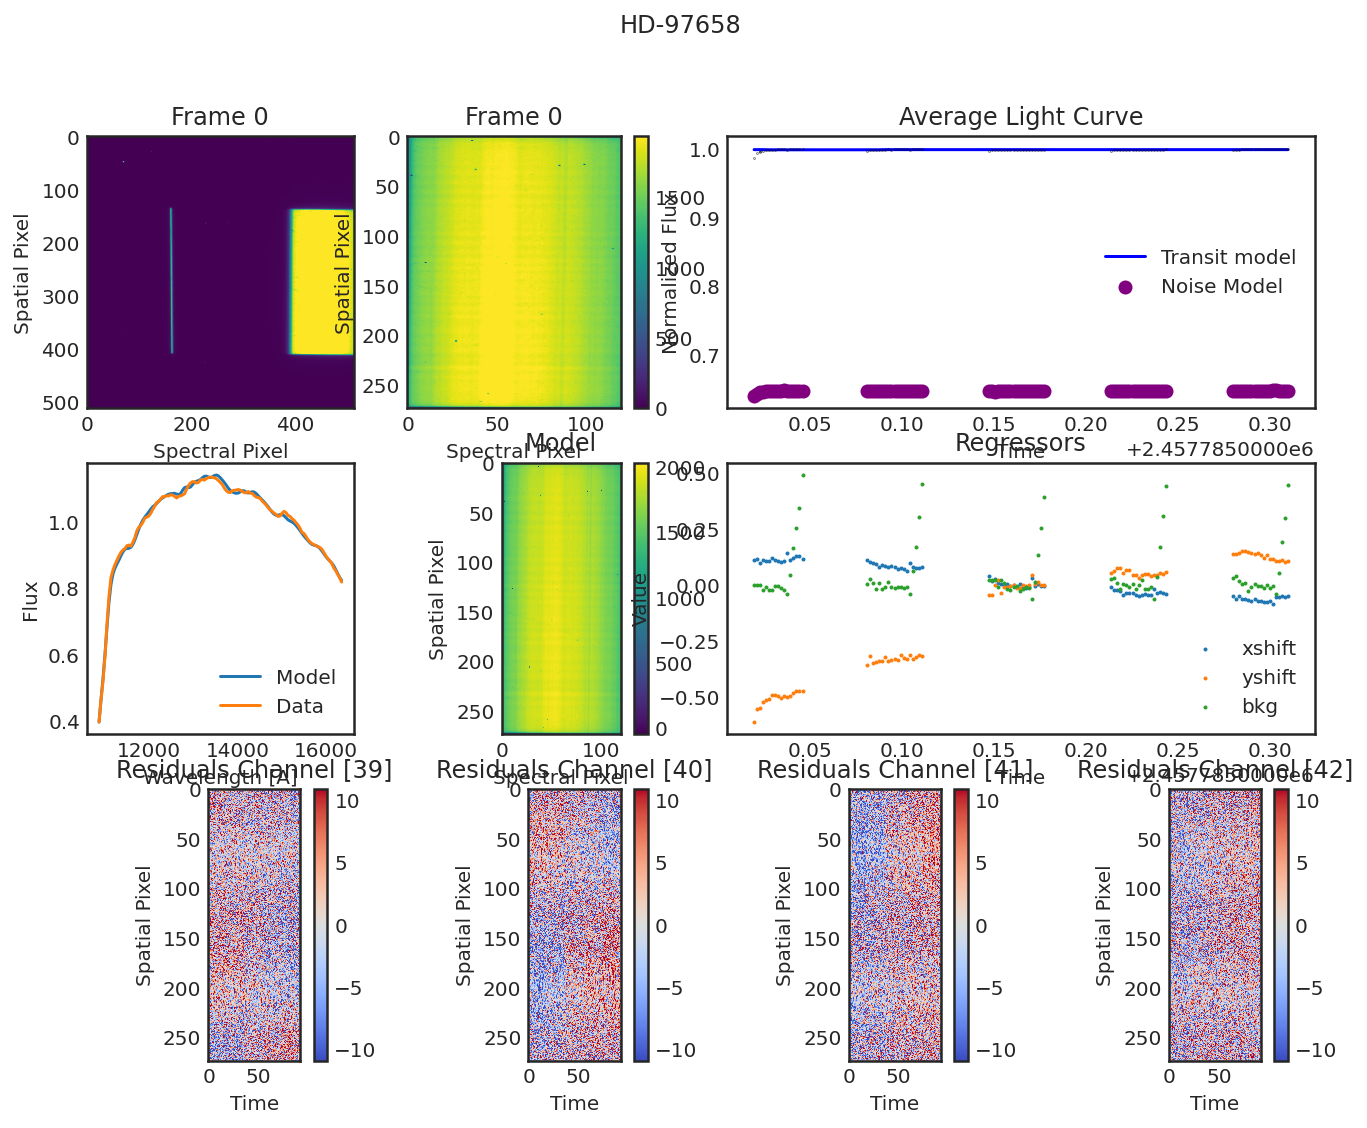

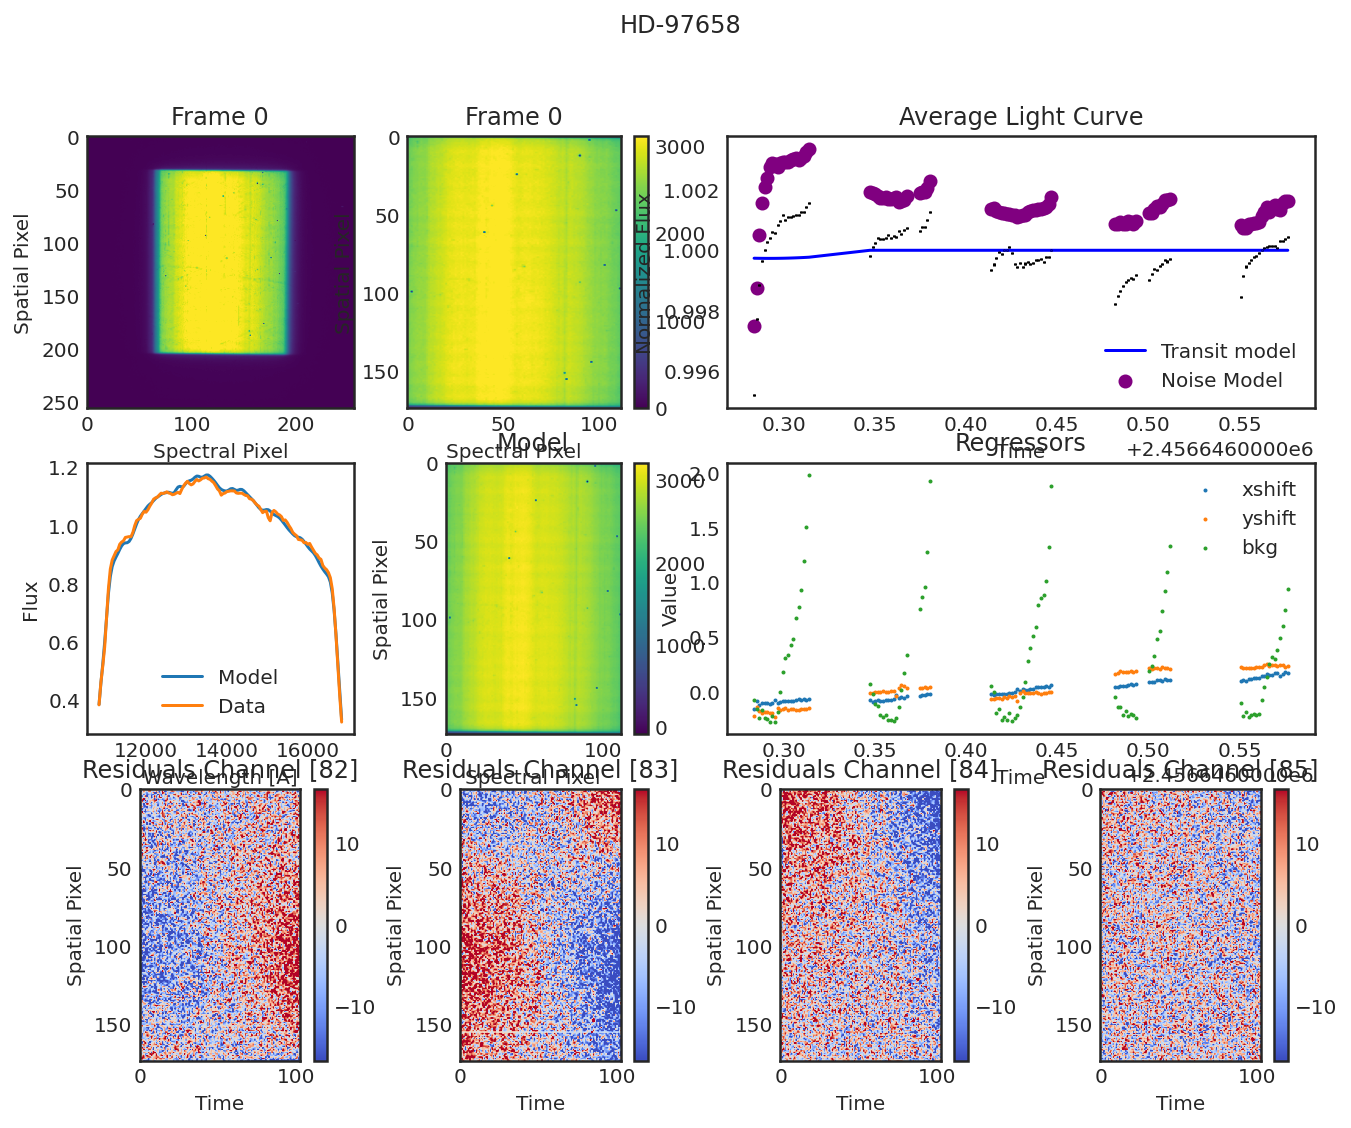

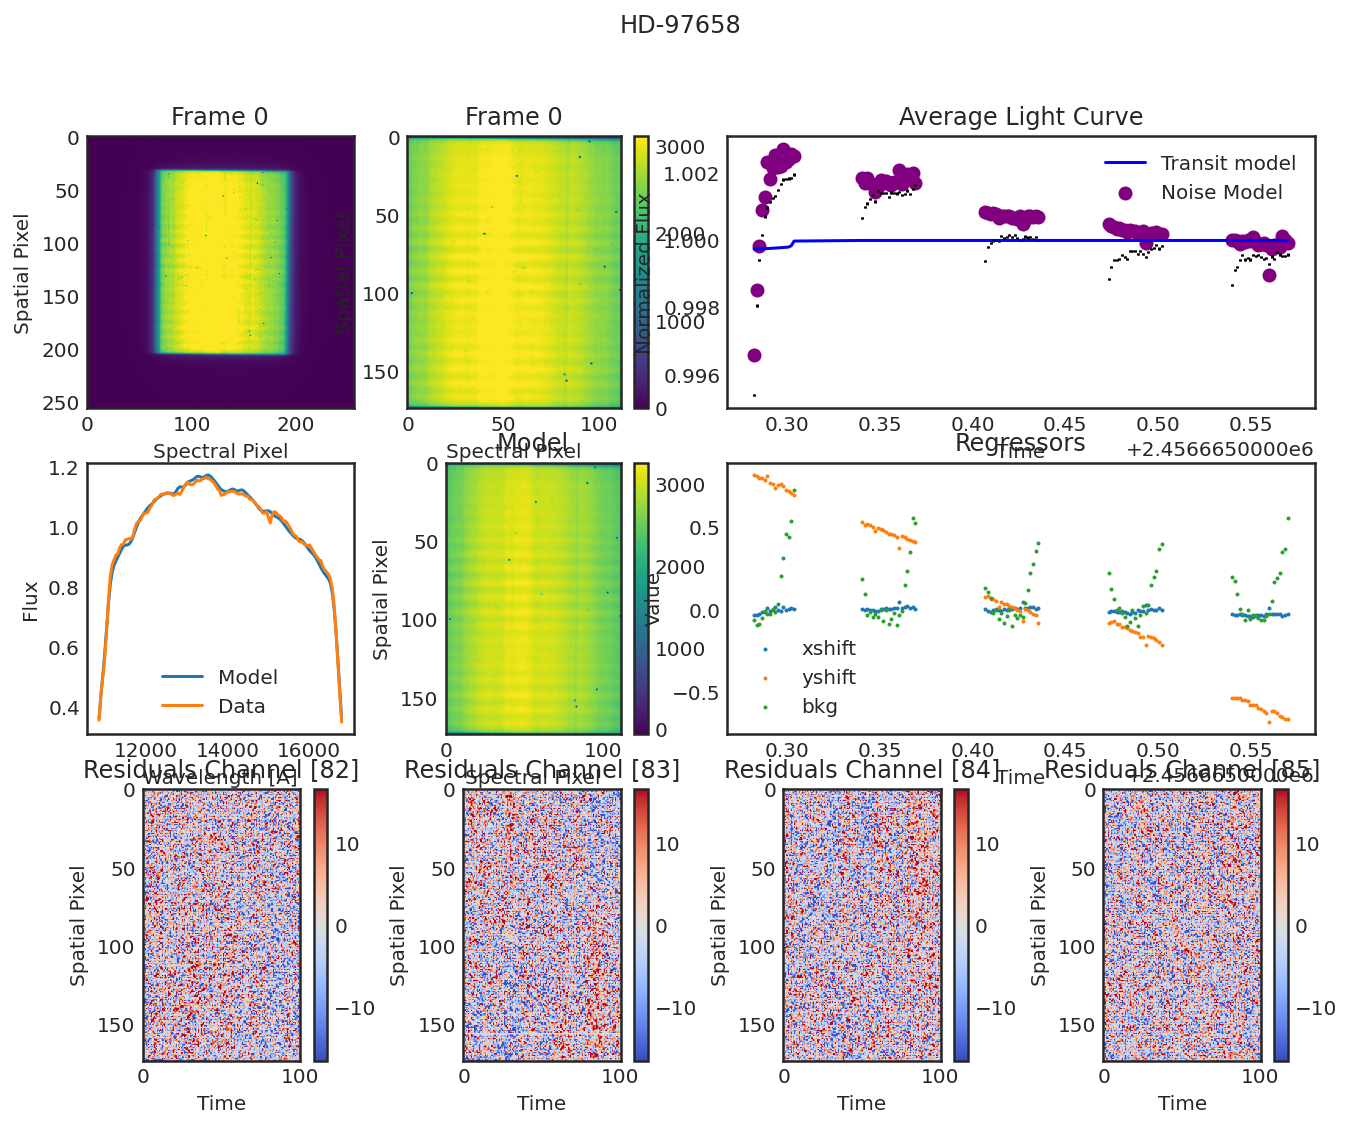

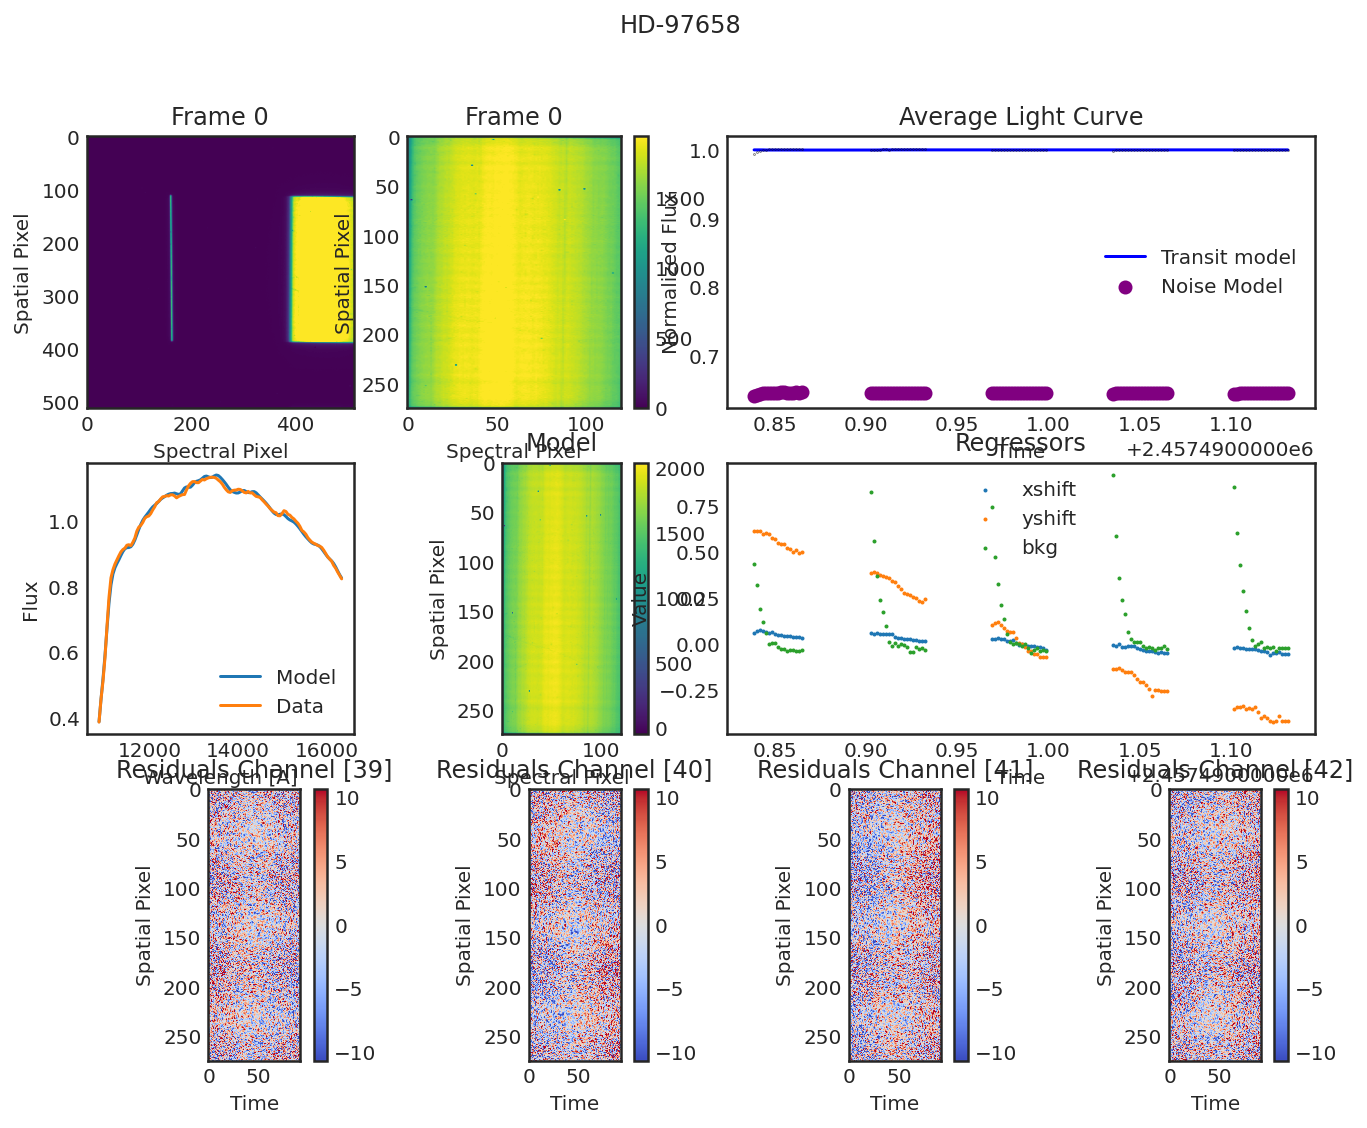

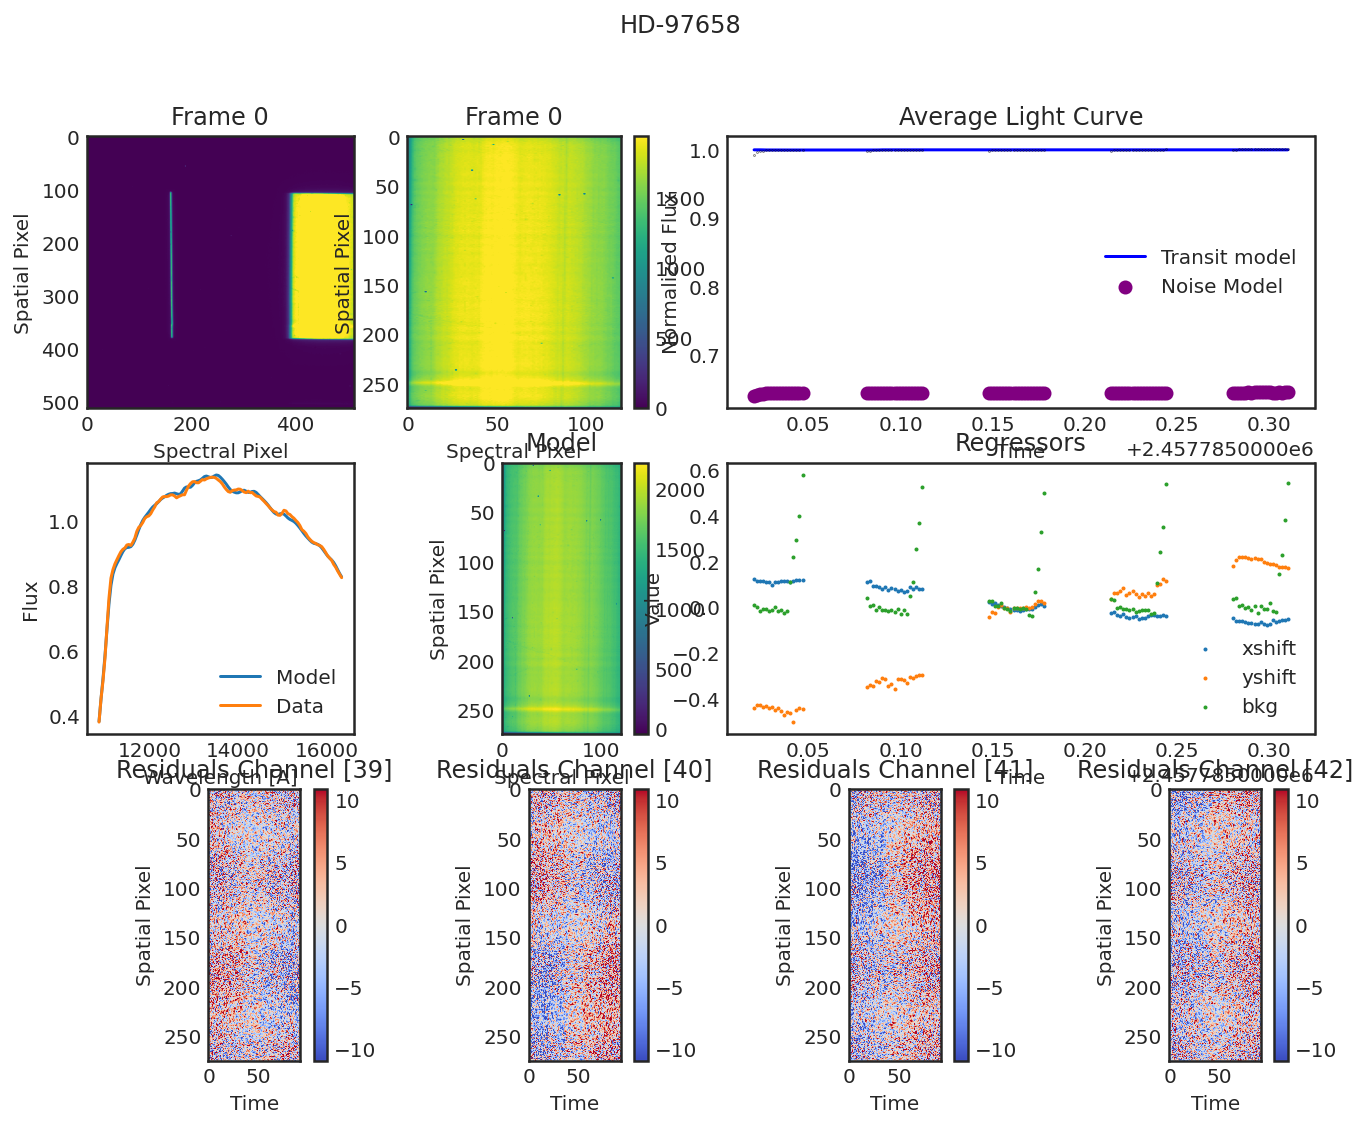

In [18]:
for visit in obs:
    visit.diagnose();
    plt.show();